# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import pickle

warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости - чтобы правильные решения давали один и тот же результат и было легче проверять")

Для воспроизводимости - чтобы правильные решения давали один и тот же результат и было легче проверять


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here

# можно и по раздельности - include='object' для только категориальных, include='number' для числовых
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
# вот тоже не совсем ясно по раздельности их выводить или после pd.concat - делаю по раздельности
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# your code here
df_train.info()

print("\n\nПропуски есть в колонках mileage, engine, max_power, torque, seats")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Пропуски есть в колонках mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
# your code here
columns = df_train.columns.drop('selling_price')
dublicates = df_train[df_train[columns].duplicated()].shape[0]

print(f"В данных есть {dublicates} дублируемых строк (без учета целевой переменной)")

В данных есть 1159 дублируемых строк (без учета целевой переменной)


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
# your code here
columns = df_train.columns.drop('selling_price')
df_train[df_train[columns].duplicated()][columns]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
# your code here
df_train.drop_duplicates(columns, keep='first', inplace=True)

In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
# your code here
df_train.reset_index(drop=True, inplace=True)

# проверка
df_train.index

RangeIndex(start=0, stop=5840, step=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
# your code here
cols_to_split = ['mileage', 'engine', 'max_power']

# предобработка столбцов - удаляем лишний текст
for col in cols_to_split:
    # меняем только те которые не пропущенные
    # в колонке 'max_power' попадается грязь - размерность без значения поэтому следим чтобы билось на 2
    ind = ~df_train[col].isna()
    df_train.loc[ind,col] = df_train.loc[ind,col].apply(lambda x: x.split()[0] if len(x.split()) == 2 else np.nan)
    
    ind = ~df_test[col].isna()
    df_test.loc[ind,col] = df_test.loc[ind,col].apply(lambda x: x.split()[0] if len(x.split()) == 2 else np.nan)
    

In [15]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,233,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6,1248,74,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [16]:
import re

def parse_torque(torque):
    # крутящий момент может быть выражен в разных величинах - Nm или kgm (1 kgm = 10 Nm)
    # сразу приводим к Nm - это более употребительно
    # 
    # как действуем:
    # если в строке есть kgm или Nm то первое встреченное число - это крутящий момент иначе он не задан
    # если в строке есть rpm то последнее число - максимальное число оборотов
    # есть еще случай "210 / 1900" - его разберу отдельно
    #
    # если явно не указаны единицы то это Nm 
    
    res = re.search(r"^(\d+?)\s+/\s+(\d+?)$", torque)
    if res is not None:
        rpm = res.group(2)
        tor = res.group(1)
    
    else:
        rpm = re.search(r"(\d+?,?\d+?)\D*?$",torque).group(1).replace(',','')
        tor = re.search(r"^\d+\.?\d*(?=\D*?.*?(?:(?:@)|(?:[Nn][Mm])|(?:[Kk][Gg][Mm])))",torque).group(0)

    # приводим к одним единицам   
    if re.search(r"[Kk][Gg][Mm]", torque):
        tor = float(tor)
        tor *= 10 # переводим в Nm
        tor = str(tor) # не хочу кастить тут - пусть идет строкой закастим потом
        
    return tor, rpm

# немного тестов на "плохих" значениях
print(parse_torque("11.5@ 4,500(kgm@ rpm)"))
print(parse_torque("22.4 kgm at 1750-2750rpm"))
print(parse_torque("11.5@ 4,500(kgm@ rpm)"))
print(parse_torque("6.1kgm@ 3000rpm"))
print(parse_torque("200Nm@ 1750rpm"))
print(parse_torque("113.75nm@ 4000rpm"))
print(parse_torque("210 / 1900"))



('115.0', '4500')
('224.0', '2750')
('115.0', '4500')
('61.0', '3000')
('200', '1750')
('113.75', '4000')
('210', '1900')


In [17]:
# разбивку 'torque' на 2 колонки я сделал, но затаскивать ее в датафрейм не буду - оно 
# там дальше потом сильно мешается
# да и не к чему оно. сделаю отдельные df_train_separated и df_test_separated

# torque - разбиваем на 2 признака
df_train_separated = df_train.copy(deep=True)
df_test_separated = df_test.copy(deep=True)

ind = ~df_train_separated['torque'].isna()
res_ser = df_train_separated.loc[ind, 'torque'].apply(parse_torque)
df_train_separated.loc[ind,'max_torque_rpm'] = res_ser.apply(lambda x: float(x[1]))
df_train_separated.loc[ind,'torque'] = res_ser.apply(lambda x: float(x[0]))

# аналогично для теста
ind = ~df_test_separated['torque'].isna()
res_ser = df_test_separated.loc[ind, 'torque'].apply(parse_torque)
df_test_separated.loc[ind,'max_torque_rpm'] = res_ser.apply(lambda x: float(x[1]))
df_test_separated.loc[ind,'torque'] = res_ser.apply(lambda x: float(x[0]))

In [18]:
# все получилось
df_train_separated[['torque','max_torque_rpm']].head()

,torque,max_torque_rpm
0,190.0,2000.0
1,250.0,2500.0
2,224.0,2750.0
3,115.0,4500.0
4,113.75,4000.0


In [19]:
# удаляем tourche - как сказано в основной ветке задания
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [20]:
from sklearn.impute import SimpleImputer

# your code here
cols = ['mileage', 'engine', 'max_power','seats']

for col in cols:
    df_train[col].astype(float)
    df_test[col].astype(float)
    
imp = SimpleImputer(strategy='mean')

# вообще если уж мы заполняем пропуски на трейне, то в тесте тоже это нужно сделать (заполняем средними из трейна)
df_train[['mileage', 'engine', 'max_power','seats']] = \
        imp.fit_transform(df_train[['mileage', 'engine', 'max_power','seats']])
df_test[['mileage', 'engine', 'max_power','seats']] = \
        imp.transform(df_test[['mileage', 'engine', 'max_power','seats']])

In [21]:
# убедимся что пропусков больше нет 
pd.concat([df_train, df_test]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 6840 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6840 non-null   object 
 1   year           6840 non-null   int64  
 2   selling_price  6840 non-null   int64  
 3   km_driven      6840 non-null   int64  
 4   fuel           6840 non-null   object 
 5   seller_type    6840 non-null   object 
 6   transmission   6840 non-null   object 
 7   owner          6840 non-null   object 
 8   mileage        6840 non-null   float64
 9   engine         6840 non-null   float64
 10  max_power      6840 non-null   float64
 11  seats          6840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 694.7+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [22]:
df_train.loc[:,'seats'] = df_train['seats'].astype(int)
df_test.loc[:,'seats'] = df_test['seats'].astype(int)

df_train.loc[:,'engine'] = df_train['engine'].astype(int)
df_test.loc[:,'engine'] = df_test['engine'].astype(int)


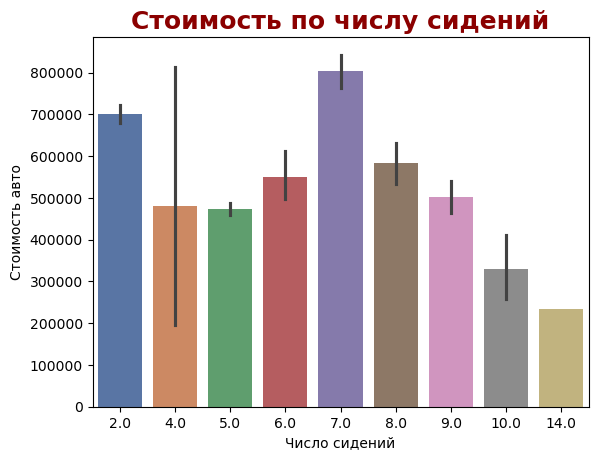

In [23]:
df = df_train[['seats', 'selling_price']]
df.loc[:,'seats'] = df['seats'].astype(int, errors='ignore')

plt.title("Стоимость по чиcлу сидений", fontdict={'color':  'darkred', 'weight': 'bold', 'size': 18})
sns.barplot(data=df, x = 'seats', y='selling_price', palette="deep")
plt.xlabel("Число сидений")
plt.ylabel("Стоимость авто")


plt.show()


In [24]:
print(
"""
Потому что преобразование к int подразумевает что множество значений признка упорядочено, в линейной 
модели значение ц.п предполагается линейно зависимой от признаков, здесь зависимость явно нелинейная
7-местные стоят дороже 4-местных, 4-м дешевле 2-х местных (некоторых, не в этом датасете) а 14-м вообще дешевые-
полный бардак
"""
)


Потому что преобразование к int подразумевает что множество значений признка упорядочено, в линейной 
модели значение ц.п предполагается линейно зависимой от признаков, здесь зависимость явно нелинейная
7-местные стоят дороже 4-местных, 4-м дешевле 2-х местных (некоторых, не в этом датасете) а 14-м вообще дешевые-
полный бардак



## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

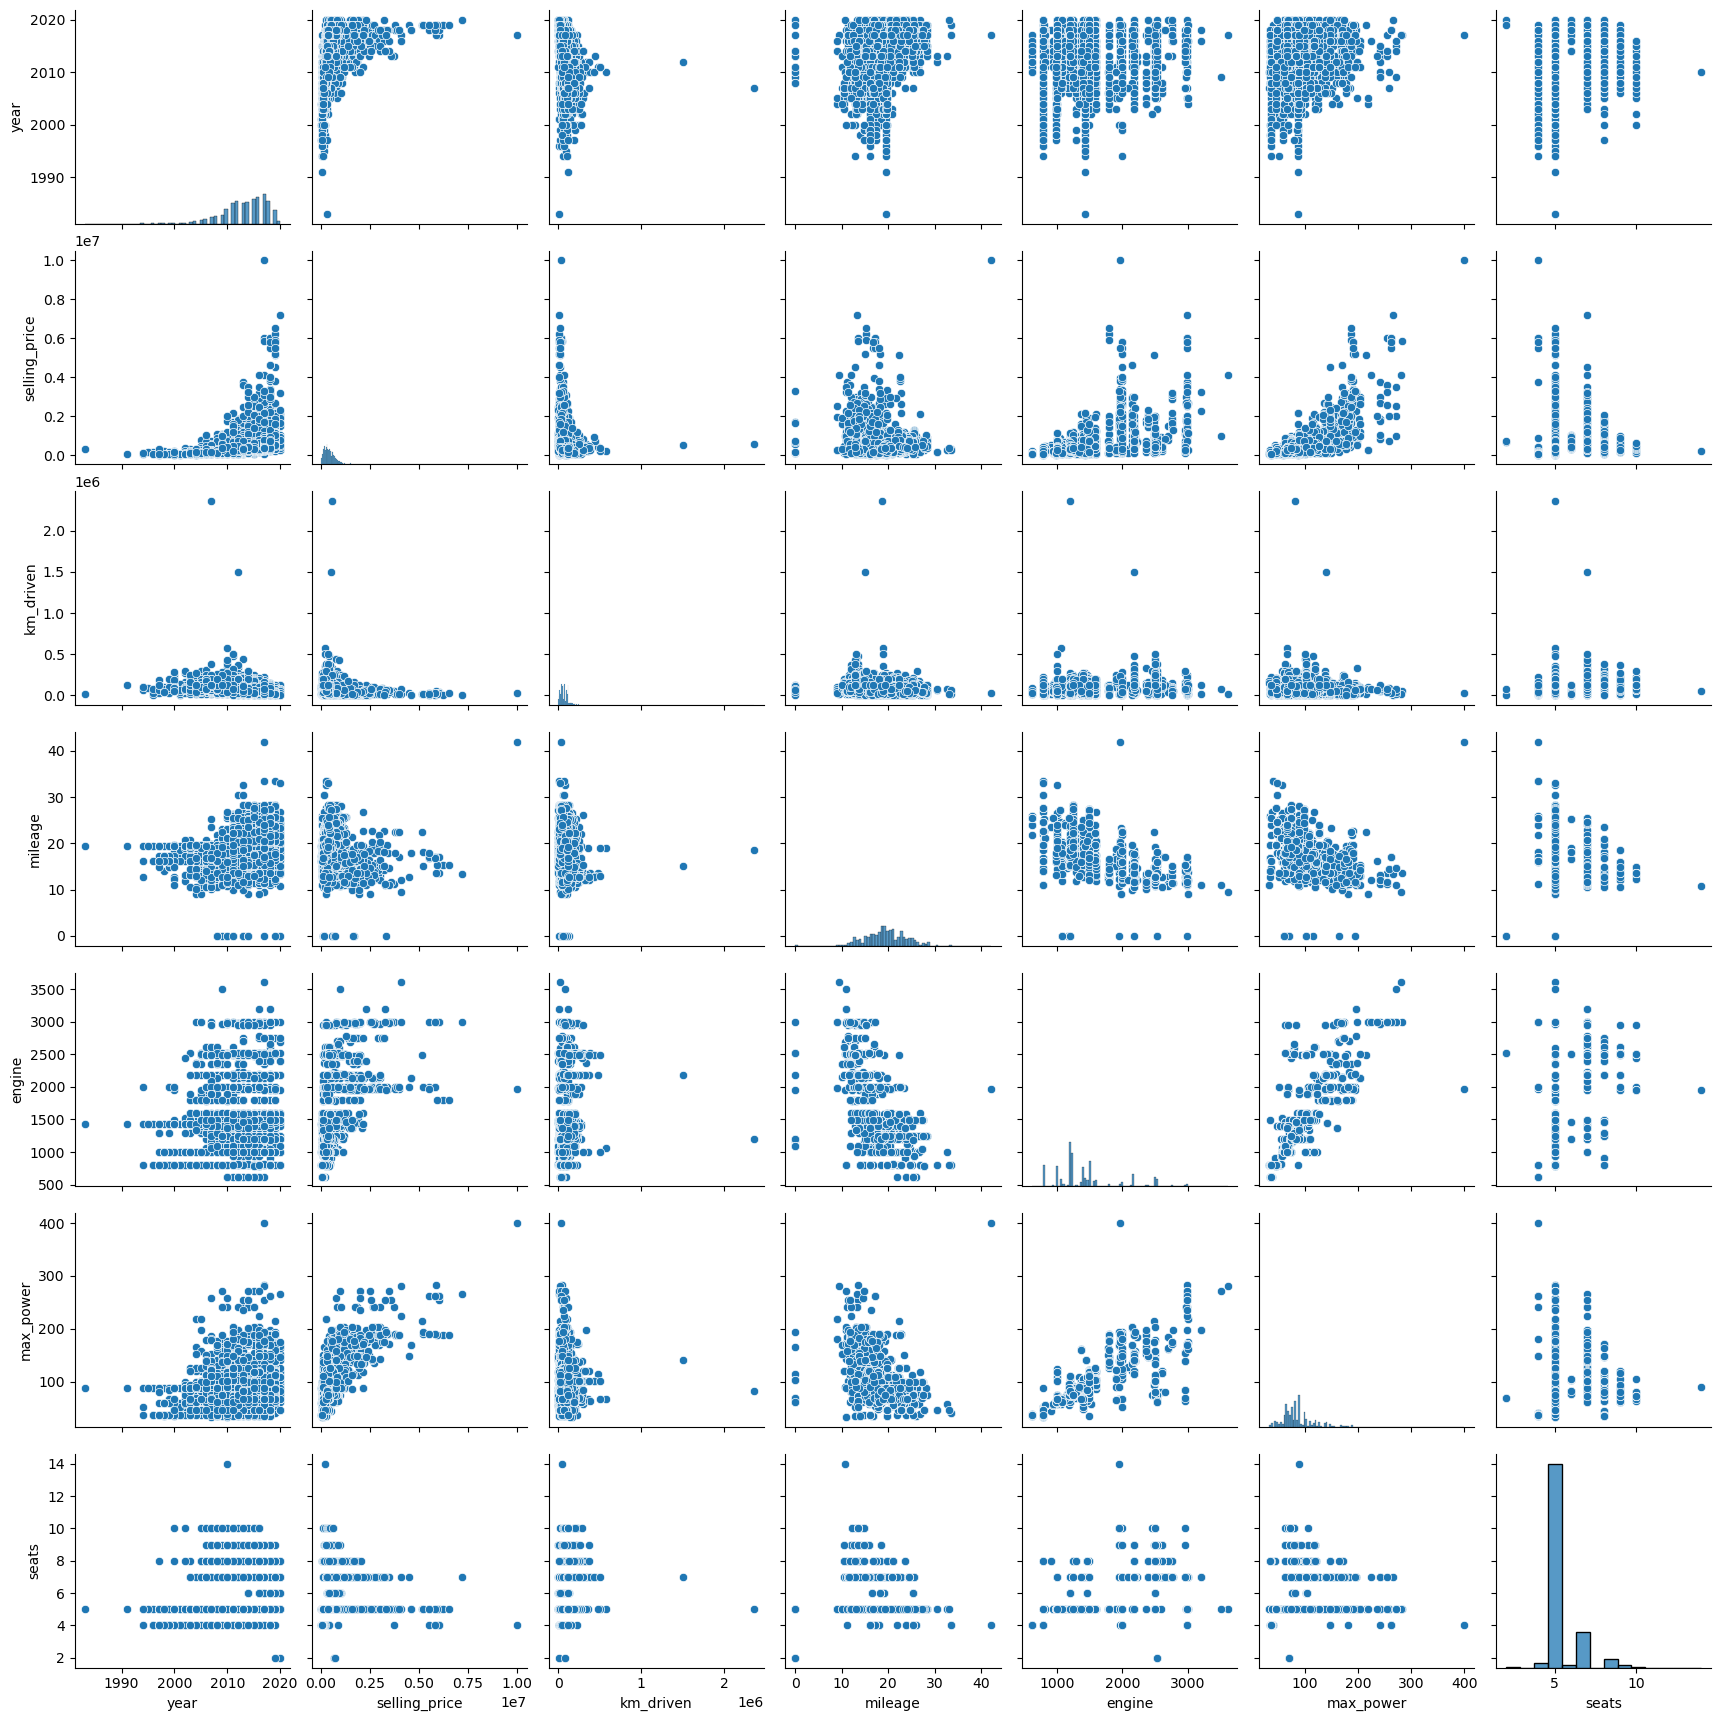

In [25]:
# your code here
cat_mask = (df_train.dtypes == "object").values
sns.pairplot(df_train.loc[:,~cat_mask])
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [26]:
print(
"""
У ЦП есть зависимости с предикторами но не со всеми эта зависимость линейна. 
Есть некоторая прямая зависимость с 'max_power', 'year', 'engine', 'max_power' и обратная с 'km_diven'
"""
)


У ЦП есть зависимости с предикторами но не со всеми эта зависимость линейна. 
Есть некоторая прямая зависимость с 'max_power', 'year', 'engine', 'max_power' и обратная с 'km_diven'



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

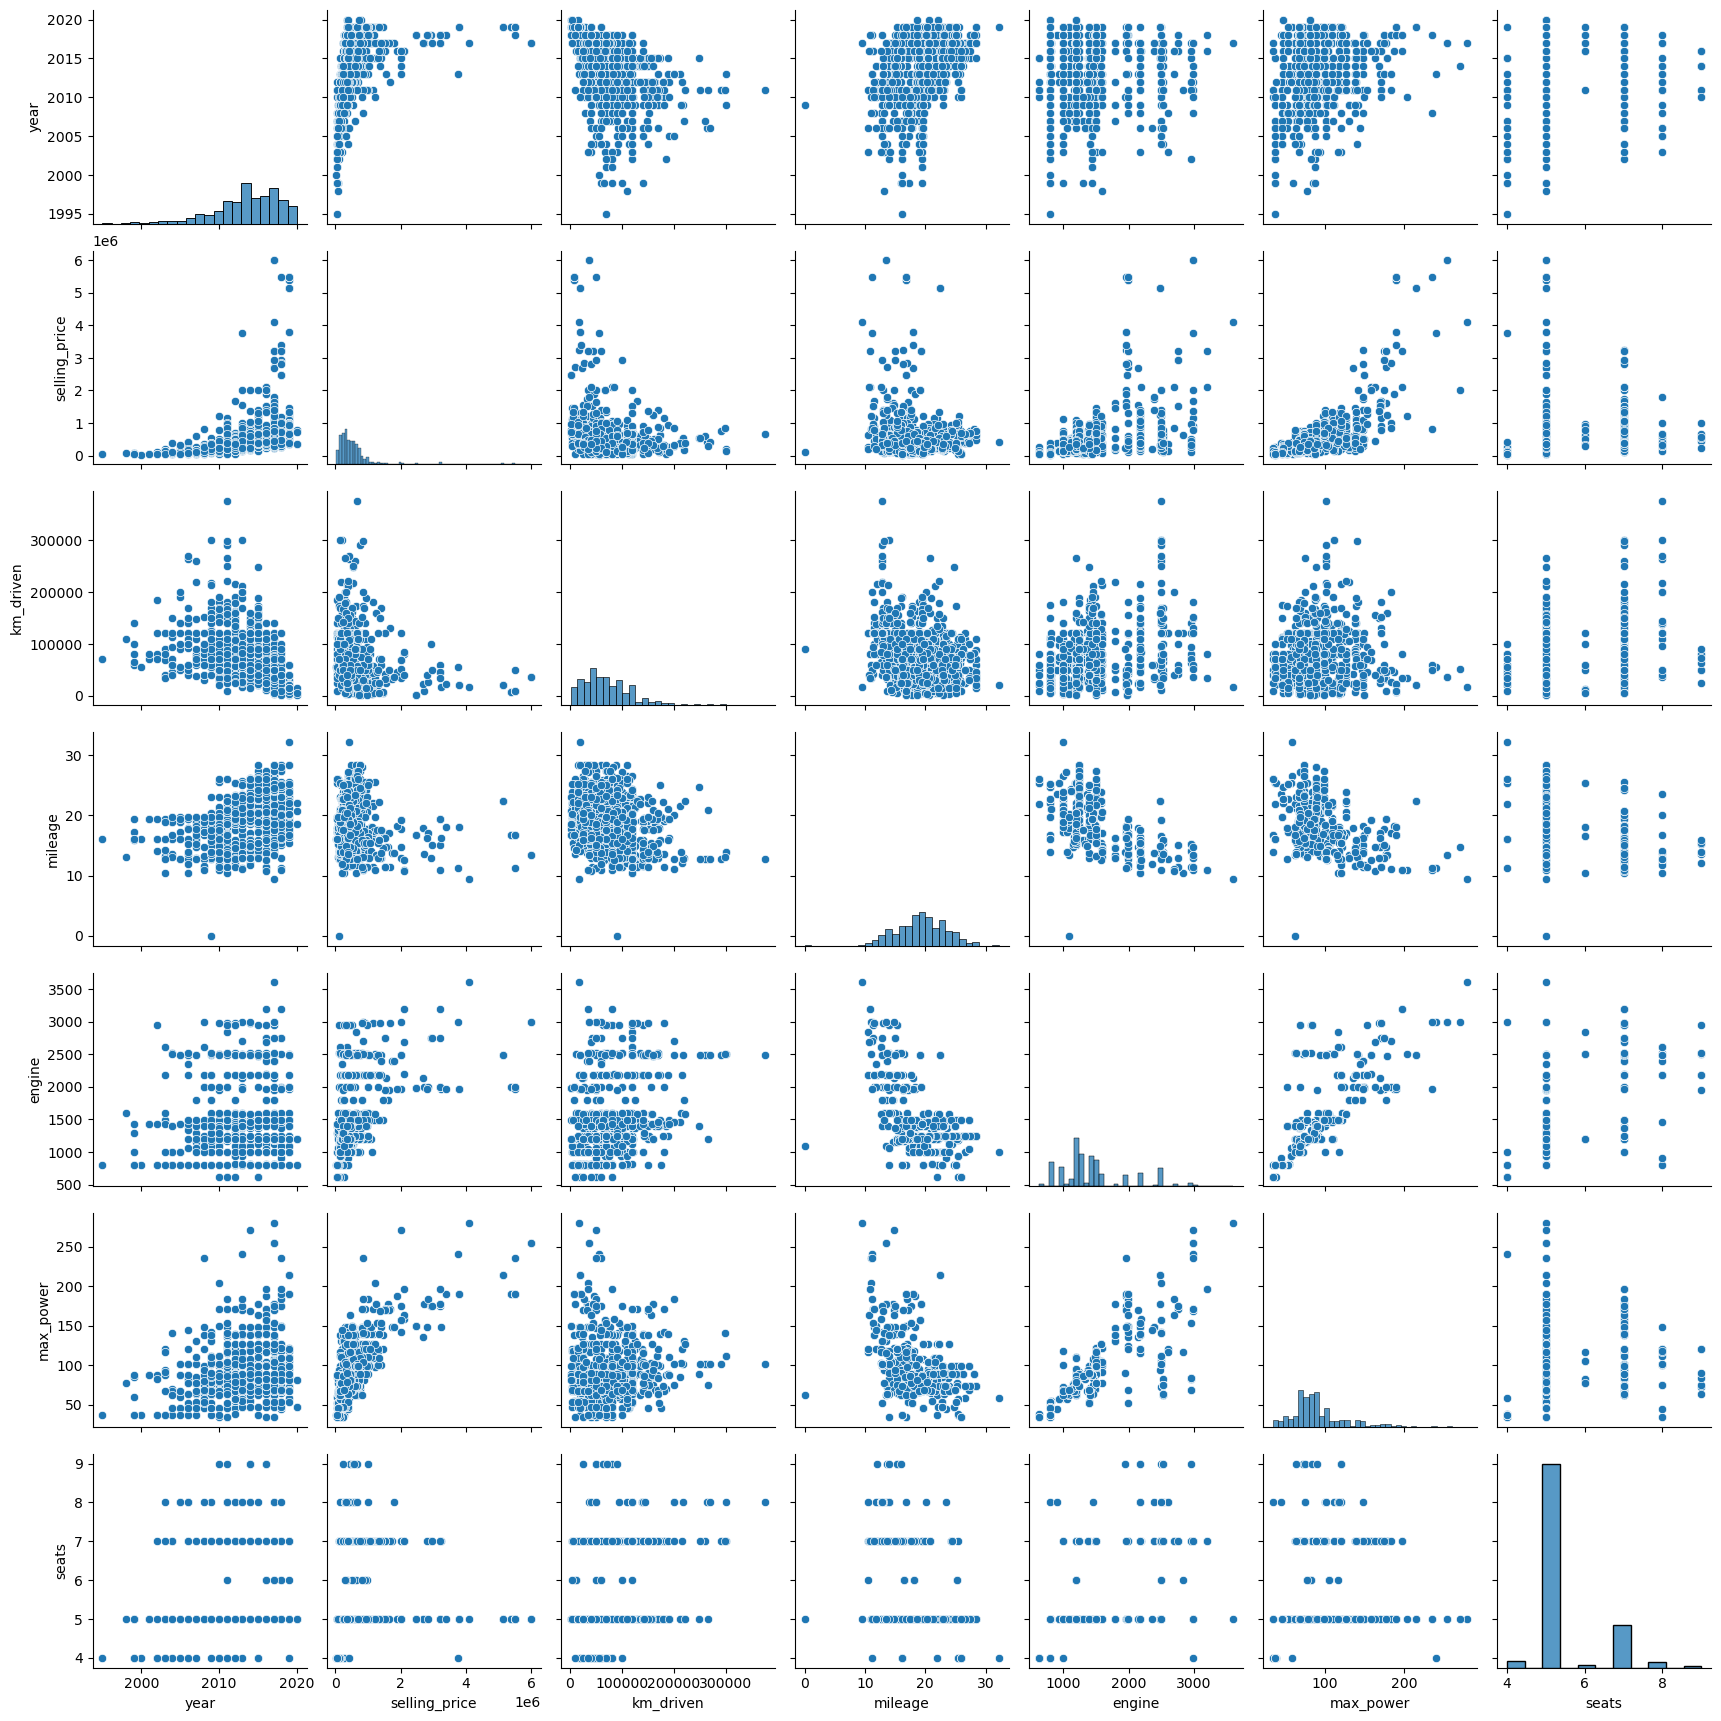


Лично мне совокупности оказались в принципе похожими но графики слишком мелкие чтобы что-то толковое разглядеть



In [27]:
# your code here
cat_mask = (df_test.dtypes == "object").values
sns.pairplot(df_test.loc[:,~cat_mask])
plt.show()

print("""
Лично мне совокупности оказались в принципе похожими но графики слишком мелкие чтобы что-то толковое разглядеть
""")

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

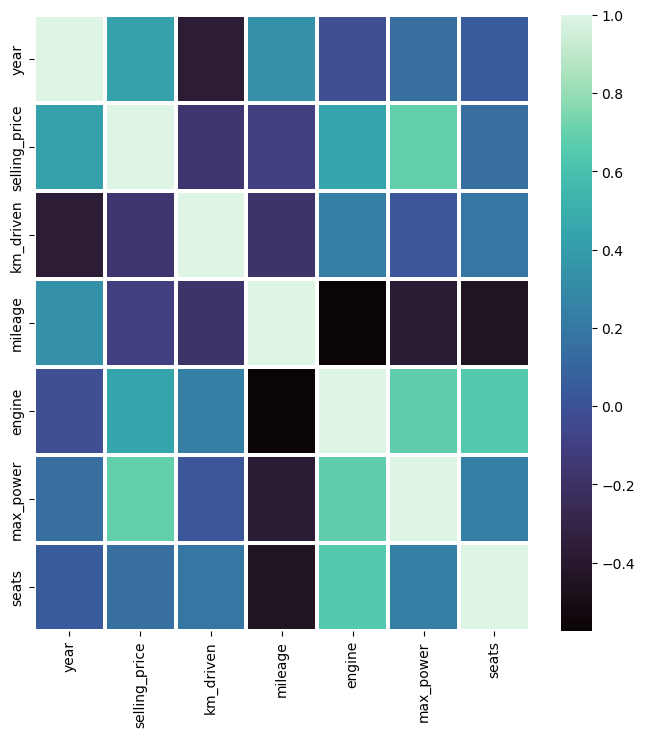

In [28]:
# your code here
cat_mask = (df_train.dtypes == "object").values

plt.figure(figsize=(8,8))
sns.heatmap(df_train.loc[:,~cat_mask].corr(), linewidths=1.7, cmap="mako")
plt.show()



Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [29]:
# по табличке удобнее смотреть
df_train.loc[:,~cat_mask].corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340579,-0.015696,0.147558,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105048,0.441884,0.690619,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.181941,0.233853,0.026407,0.192328
mileage,0.340579,-0.105048,-0.181941,1.000000,-0.574404,-0.374552,-0.451279
engine,-0.015696,0.441884,0.233853,-0.574404,1.000000,0.681538,0.648335
max_power,0.147558,0.690619,0.026407,-0.374552,0.681538,1.000000,0.241498
seats,0.041178,0.149953,0.192328,-0.451279,0.648335,0.241498,1.000000


In [30]:
print(
"""
Ответы на вопросы

1. 'engine' и 'year' (-0.015696)
2. 'max_power' и 'selling_price' (0.690619) + 'engine' и 'max_power' (0.681538)
3. Да, можно утверждать что что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи
т.к к-т корреляции -0.368966 

"""
)


Ответы на вопросы

1. 'engine' и 'year' (-0.015696)
2. 'max_power' и 'selling_price' (0.690619) + 'engine' и 'max_power' (0.681538)
3. Да, можно утверждать что что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи
т.к к-т корреляции -0.368966 




(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Figure size 800x800 with 0 Axes>

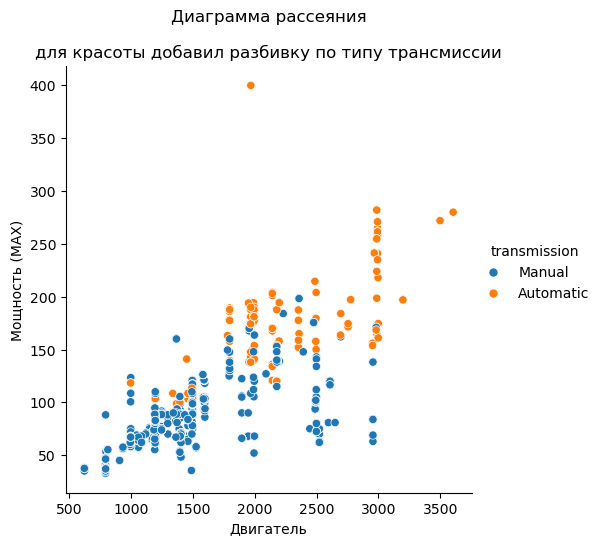

In [31]:
# your code here
plt.figure(figsize=(8,8))
g = sns.relplot(data = df_train, x='engine', y = 'max_power', hue='transmission', cmap="mako")
g.set(xlabel='Двигатель', ylabel='Мощность (MAX)', title='Диаграмма рассеяния\n\nдля красоты добавил разбивку по типу трансмиссии')

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Распределение пробега в зависимости от года выпуска
Вывод: дизельные машины в среднем живут меньше но эксплуатируются интенсивнее


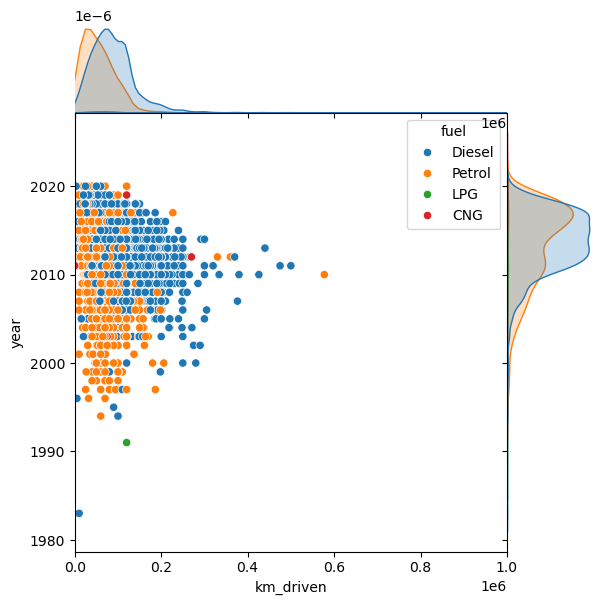

In [33]:
# попробую сделать что-нибудь красивое
print("Распределение пробега в зависимости от года выпуска")
print("Вывод: дизельные машины в среднем живут меньше но эксплуатируются интенсивнее")

sns.jointplot(data=df_train, y="year", x="km_driven", xlim=(0, 1000000), hue="fuel", space=0)
plt.show()


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [34]:
# у нас на самом деле seats до сих пор вещественный, мы пока с ним ничего не делали. Поэтому фраза
# "Категориальные (все, кроме seats) столбцы тоже" - не совсем корректна

y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)

cat_mask = (X_train.dtypes == "object").values
X_train = X_train.loc[:,~cat_mask]

X_train.shape

(5840, 6)

In [35]:
assert X_train.shape == (5840, 6)

In [36]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)

cat_mask = (X_test.dtypes == "object").values
X_test = X_test.loc[:,~cat_mask]

X_test.shape


(1000, 6)

In [37]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f"MSE: train {MSE(y_train, y_pred_train)}, test  {MSE(y_test, y_pred_test)}")
print(f"r2: train {r2_score(y_train, y_pred_train)}, test  {r2_score(y_test, y_pred_test)}")


MSE: train 116694562986.49841, test  233278122255.54834
r2: train 0.5928857121659781, test  0.5941779162372101


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# your code here
sc = StandardScaler()

columns = X_train.columns

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test_sc = lr.predict(X_test)
y_pred_train_sc = lr.predict(X_train)


print(f"MSE: train {MSE(y_train, y_pred_train_sc)}, test  {MSE(y_test, y_pred_test_sc)}")
print(f"r2: train {r2_score(y_train, y_pred_train_sc)}, test  {r2_score(y_test, y_pred_test_sc)}")


MSE: train 116694562986.49889, test  233278122255.53952
r2: train 0.5928857121659763, test  0.5941779162372254


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [40]:
# your code here
ps = pd.DataFrame(lr.coef_, index=columns, columns=['w']).sort_values(by='w', 
                                                                              ascending=False, 
                                                                              key=lambda x: np.abs(x))
ps

,w
max_power,323047.643006
year,157775.327032
engine,58575.231725
km_driven,-43170.985417
mileage,27014.984460
seats,-21711.504158


In [41]:
print('Самый информативный - max_power, далее в порядке убывания значимости')

Самый информативный - max_power, далее в порядке убывания значимости


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [42]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred_test_sc = lasso.predict(X_test)
y_pred_train_sc = lasso.predict(X_train)


print(f"MSE: train {MSE(y_train, y_pred_train_sc)}, test  {MSE(y_test, y_pred_test_sc)}")
print(f"r2: train {r2_score(y_train, y_pred_train_sc)}, test  {r2_score(y_test, y_pred_test_sc)}")

ps = pd.DataFrame(lasso.coef_, index=columns, columns=['w']).sort_values(by='w', 
                                                                              ascending=False, 
                                                                              key=lambda x: np.abs(x))
ps

MSE: train 116694562996.6598, test  233278791744.6845
r2: train 0.5928857121305278, test  0.594176751561013


,w
max_power,323048.568900
year,157775.032798
engine,58570.389295
km_driven,-43169.871428
mileage,27013.147153
seats,-21708.619516


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [43]:
print("Не занулила потому что слабо регуляризируем, маловат коэффициент")

Не занулила потому что слабо регуляризируем, маловат коэффициент


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [44]:
from sklearn.model_selection import GridSearchCV

param =  {'alpha': np.arange(1,100000,50)}
lass = GridSearchCV(Lasso(), param, scoring='r2', cv=10)
lass.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([    1,    51,   101, ..., 99851, 99901, 99951])},
             scoring='r2')

Все стало даже хуже: R2 уменьшился на лучшей модели: 0.5758923542219829


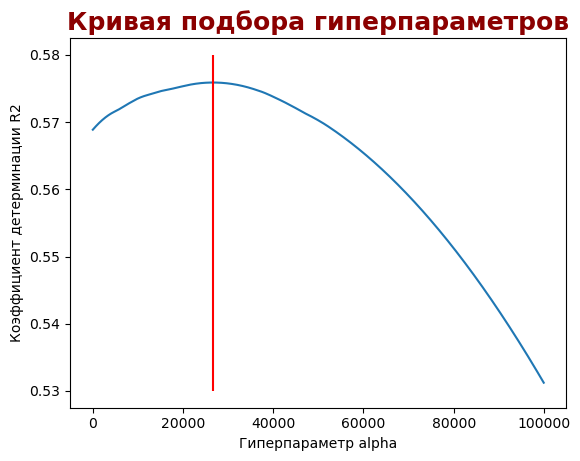

In [45]:
print("Все стало даже хуже: R2 уменьшился на лучшей модели:", lass.best_score_)

plt.figure()
plt.title("Кривая подбора гиперпараметров", fontdict={'color':  'darkred', 'weight': 'bold', 'size': 18})

sns.lineplot(x=lass.cv_results_['param_alpha'], y=lass.cv_results_['mean_test_score'])
plt.vlines(x= lass.best_params_['alpha'], ymin=0.53, ymax=.58, colors='red', label="Бест")
plt.xlabel("Гиперпараметр alpha")
plt.ylabel("Коэффициент детерминации R2")
plt.show()

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [46]:
# учились на 10 фолдах len(np.arange(1,100000,50))

print("Обучили моделей:", len(np.arange(1,100000,50))*10)

Обучили моделей: 20000


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [47]:
ps = pd.DataFrame(lass.best_estimator_.coef_, index=columns, columns=['w']).sort_values(by='w', 
                                                                              ascending=False, 
                                                                              key=lambda x: np.abs(x))

# your code here
print("Лучший коэффициент регуляризации: ", lass.best_params_['alpha'])
print("Занулились параметры:", *list(ps[ps['w'] ==0].index))
print("\n\nВеса после регуляризации")
ps

Лучший коэффициент регуляризации:  26651
Занулились параметры: mileage engine seats


Веса после регуляризации


,w
max_power,321493.395975
year,149105.256038
km_driven,-15070.845538
mileage,0.000000
engine,0.000000
seats,-0.000000


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [48]:
from sklearn.linear_model import ElasticNet

# прогоним по 2м параметрам
param =  {'alpha': np.arange(1,100,1), 'l1_ratio':np.arange(0.01,1,0.1)}
el = GridSearchCV(ElasticNet(), param, scoring='r2', cv=10)
el.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'l1_ratio': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [49]:
# your code here
print("R2 на лучшей модели:", el.best_score_)
print('Лучшие параметры: ', el.best_params_)

R2 на лучшей модели: 0.5769403944745353
Лучшие параметры:  {'alpha': 2, 'l1_ratio': 0.91}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [50]:
# your code here

y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(['selling_price','name'], axis=1)

y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(['selling_price','name'], axis=1)

X_train_cat.shape

(5840, 10)

In [51]:
# Т.к мы заново "отпочковываемся" от df_train и df_test которые неотшкалированы, их стоит отшкалировать заново

X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_test_cat['seats'] = X_test_cat['seats'].astype('object')

scaler = StandardScaler()
num_cols = X_train_cat.select_dtypes(exclude=['object']).columns
print(num_cols)
X_train_cat[num_cols] = scaler.fit_transform(X_train_cat[num_cols])
X_test_cat[num_cols] =  scaler.transform(X_test_cat[num_cols])


Index(['year', 'km_driven', 'mileage', 'engine', 'max_power'], dtype='object')


In [52]:
# проверим что хорошо отшкалировалось
X_train_cat.describe(exclude='object')

,year,km_driven,mileage,engine,max_power
count,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03
mean,2.328122e-14,-6.205082e-17,1.496520e-16,-5.353404e-17,-6.935092e-17
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-7.430137e+00,-1.231167e+00,-4.875743e+00,-1.674709e+00,-1.754033e+00
25%,-5.929826e-01,-5.818974e-01,-6.229506e-01,-4.920587e-01,-6.385467e-01
50%,1.395696e-01,-6.579834e-02,8.913837e-16,-3.867966e-01,-1.948876e-01
75%,8.721218e-01,4.336523e-01,7.193762e-01,1.291942e-01,3.438414e-01
max,1.604674e+00,3.806654e+01,5.662150e+00,4.475900e+00,9.882513e+00


In [53]:
assert X_train_cat.shape == (5840, 10)

In [54]:
X_train_cat['seats'].unique()

array([5.0, 4.0, 7.0, 8.0, 6.0, 9.0, 10.0, 14.0, 2.0], dtype=object)

In [55]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840.0
unique,4,3,2,5,9.0
top,Diesel,Individual,Manual,First Owner,5.0
freq,3177,5223,5336,3603,4618.0


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [56]:
from sklearn.preprocessing import OneHotEncoder

# your code here
enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = enc.fit_transform(X_train_cat[["fuel","seller_type","transmission","owner","seats"]])
X_train_cat[enc.get_feature_names_out()] = X_train_ohe
X_train_cat = X_train_cat.drop(["fuel","seller_type","transmission","owner","seats"], axis=1)

X_test_ohe = enc.transform(X_test_cat[["fuel","seller_type","transmission","owner","seats"]])
X_test_cat[enc.get_feature_names_out()] = X_test_ohe
X_test_cat = X_test_cat.drop(["fuel","seller_type","transmission","owner","seats"], axis=1)


X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,0.13957,1.191152,0.995369,-0.386797,-0.448407,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.13957,0.766619,0.428330,0.129194,0.487080,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
param =  {'alpha': np.arange(.01, 50, .05)}
reg = GridSearchCV(Ridge(), param, scoring='r2', cv=10)
reg.fit(X_train_cat, y_train_cat)

print("Лучшее значение гиперпараметра: ", reg.best_params_)
print("Лучшее значение R2: ", reg.best_score_)

Лучшее значение гиперпараметра:  {'alpha': 7.71}
Лучшее значение R2:  0.6231431849350136


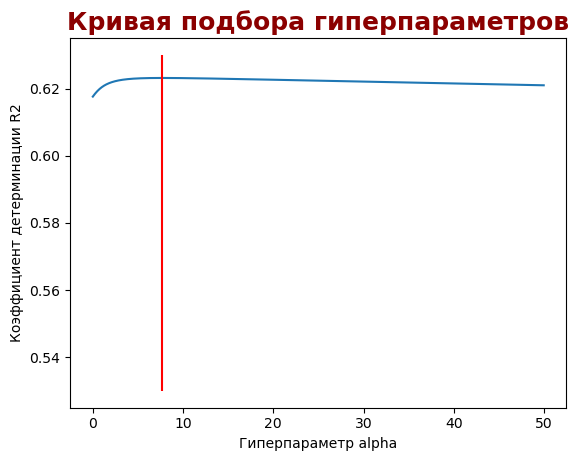

In [58]:
plt.figure()
plt.title("Кривая подбора гиперпараметров", fontdict={'color':  'darkred', 'weight': 'bold', 'size': 18})

sns.lineplot(x=reg.cv_results_['param_alpha'], y=reg.cv_results_['mean_test_score'])
plt.vlines(x= reg.best_params_['alpha'], ymin=0.53, ymax=.63, colors='red', label="Бест")
plt.xlabel("Гиперпараметр alpha")
plt.ylabel("Коэффициент детерминации R2")
plt.show()

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [59]:
# в качестве доп задания добавль полиномиальные признаки и сделаю сильную L1
# чтобы понять какие именно веса будут обнуляться

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_cat[pf.get_feature_names_out()] = pf.fit_transform(X_train_cat[['year','km_driven','mileage','engine','max_power']])
X_test_cat[pf.get_feature_names_out()] = pf.transform(X_test_cat[['year','km_driven','mileage','engine','max_power']])

In [60]:
X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,km_driven^2,km_driven mileage,km_driven engine,km_driven max_power,mileage^2,mileage engine,mileage max_power,engine^2,engine max_power,max_power^2
0,0.13957,1.191152,0.995369,-0.386797,-0.448407,1.0,0.0,0.0,1.0,0.0,...,1.418844,1.185636,-0.460734,-0.534121,0.990759,-0.385005,-0.446330,0.149612,0.173442,0.201069
1,0.13957,0.766619,0.428330,0.129194,0.487080,1.0,0.0,0.0,1.0,0.0,...,0.587705,0.328366,0.099043,0.373405,0.183466,0.055338,0.208631,0.016691,0.062928,0.237247


In [61]:
# обучим Lasso на сетке гиперпараметров
from sklearn.model_selection import GridSearchCV

param =  {'alpha': np.arange(1,100000,50)}
lass = GridSearchCV(Lasso(), param, scoring='r2', cv=10)
lass.fit(X_train_cat, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([    1,    51,   101, ..., 99851, 99901, 99951])},
             scoring='r2')

In [62]:
ps = pd.DataFrame(lass.best_estimator_.coef_, index=X_train_cat.columns, columns=['w']).sort_values(by='w', 
                                                                              ascending=False, 
                                                                              key=lambda x: np.abs(x))
print("Значение R2:", lass.best_score_)
print("Лучший коэффициент регуляризации: ", lass.best_params_['alpha'])
print("\nЗанулились параметры:", *list(ps[ps['w'] ==0].index))
print("\n\nВеса после регуляризации")
ps

Значение R2: 0.7581795050293783
Лучший коэффициент регуляризации:  34201

Занулились параметры: year km_driven year mileage year engine mileage km_driven engine km_driven mileage seats_14.0 mileage engine mileage max_power engine^2 engine max_power 1 seats_10.0 fuel_Diesel owner_Second Owner fuel_LPG fuel_Petrol seller_type_Individual seller_type_Trustmark Dealer transmission_Manual owner_Fourth & Above Owner owner_Test Drive Car seats_9.0 owner_Third Owner seats_4.0 seats_5.0 seats_6.0 seats_7.0 km_driven seats_8.0


Веса после регуляризации


,w
year,193962.120935
max_power,164824.869357
year max_power,123006.102431
max_power^2,65465.996451
engine,27024.398153
km_driven max_power,-27017.790166
year^2,1062.965451
mileage^2,314.822275
km_driven^2,258.552324
year km_driven,-0.000000


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [63]:
# сначала обучим  Ridge на всем трейне с гиперпараметром найденным по сетке
# и получим предикт

reg = Ridge(alpha=6.849999999999999)
reg.fit(X_train_cat, y_train_cat)
y_pred_cat = reg.predict(X_test_cat)

r2_score(y_test_cat, y_pred_cat)

0.8317932205406895

In [65]:
# считаем векторизованно
def business_metrics(y_true, y_pred):
    return ((y_true * 0.9 < y_pred) & (y_pred < y_true * 1.2)).sum() / y_true.shape[0]

business_metrics(y_test_cat, y_pred_cat)

0.331

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [66]:
# выгрузка в pickle скалера, енкодера и обученной модели
pickle.dump(scaler, open("./model/scaler.pkl", "wb"))
pickle.dump(imp, open("./model/imp.pkl", "wb"))
pickle.dump(enc, open("./model/ohe.pkl", "wb"))
pickle.dump(reg, open("./model/reg.pkl", "wb"))

In [67]:
# немного json для тестов
# выгружу еще раз все сначала, мы же ведь необработанные туда хотим отправлять
df_test_orig = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')


In [68]:
# 1 объект 
df_test_orig.iloc[10].to_json()

'{"name":"Hyundai Verna CRDi 1.6 AT SX Option","year":2018,"selling_price":1150000,"km_driven":49000,"fuel":"Diesel","seller_type":"Individual","transmission":"Automatic","owner":"First Owner","mileage":"22.0 kmpl","engine":"1582 CC","max_power":"126.2 bhp","torque":"259.87nm@ 1500-3000rpm","seats":5.0}'

In [69]:
# несколько объектов
df_test_orig.iloc[105].to_json(orient="records")

'["Maruti Swift LXI Option",2014,400000,50000,"Petrol","Individual","Manual","First Owner","20.4 kmpl","1197 CC","81.80 bhp","113Nm@ 4200rpm",5.0]'

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

## Спасибо !


